In [1]:
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
from math import pi
from scipy import interpolate

In [2]:
nH = 1e-9
pF = 1e-12
MHz = 1e6

In [3]:
def load_data(fn, nports=2):
    dataset = np.loadtxt(fn, skiprows=9, delimiter=',')
    if nports==2:
        dtypes = np.dtype([("frequency", np.float64), ("S11", np.complex128),\
            ("S12", np.complex128), ("S21", np.complex128), ("S22", np.complex128)])
        s11 = dataset[:, 1] + 1j*dataset[:, 2]
        s12 = dataset[:, 3] + 1j*dataset[:, 4]
        s21 = dataset[:, 5] + 1j*dataset[:, 6]
        s22 = dataset[:, 7] + 1j*dataset[:, 8]
        tup = list(zip(dataset[:, 0], s11, s12, s21, s22))
        return np.array(tup, dtype=dtypes)
    elif nports==3:
        dtypes = np.dtype([("frequency", np.float64), ("S11", np.complex128),\
            ("S12", np.complex128), ("S13", np.complex128), ("S21", np.complex128),\
            ("S22", np.complex128), ("S23", np.complex128), ("S31", np.complex128),\
            ("S32", np.complex128), ("S33", np.complex128)])
        s11 = dataset[:, 1] + 1j*dataset[:, 2]
        s12 = dataset[:, 3] + 1j*dataset[:, 4]
        s13 = dataset[:, 5] + 1j*dataset[:, 6]
        s21 = dataset[:, 7] + 1j*dataset[:, 8]
        s22 = dataset[:, 9] + 1j*dataset[:,10]
        s23 = dataset[:,11] + 1j*dataset[:,12]
        s31 = dataset[:,13] + 1j*dataset[:,14]
        s32 = dataset[:,15] + 1j*dataset[:,16]
        s33 = dataset[:,17] + 1j*dataset[:,18]
        tup = list(zip(dataset[:, 0], s11, s12, s13, s21, s22, s23, s31, s32, s33))
        return np.array(tup, dtype=dtypes)
   

In [4]:
resonator_fn = "../numerical_sims/waffle_273MHz_resonator_net.csv"
reso_params = load_data(resonator_fn)

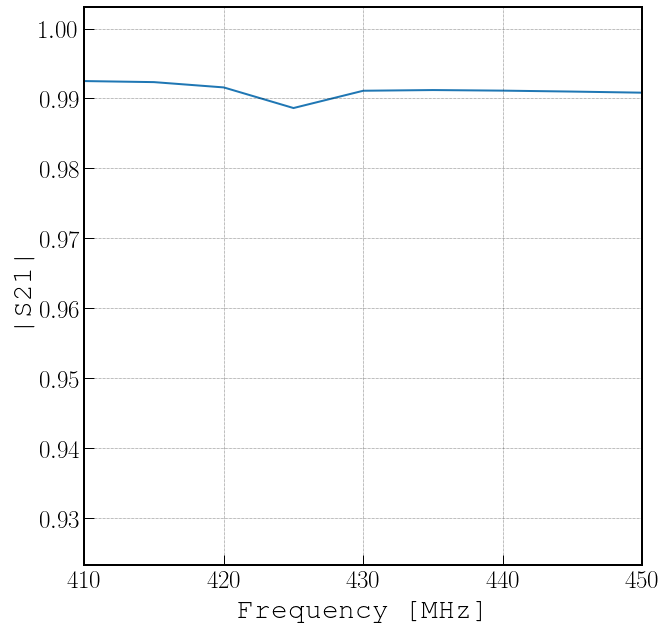

In [13]:
fig, ax = plt.subplots(figsize=(10,10))
ax.plot(reso_params['frequency'], np.abs(reso_params['S21']))
ax.grid(which='both')
ax.set_xlabel('Frequency [MHz]')
ax.set_ylabel(r'|S21|')
ax.set_xlim(410, 450);

In [6]:
get_S21 = interpolate.interp1d(reso_params['frequency'], reso_params['S21'], kind='cubic')

In [9]:
f = np.r_[420:430:1000j]
S21 = get_S21(f)

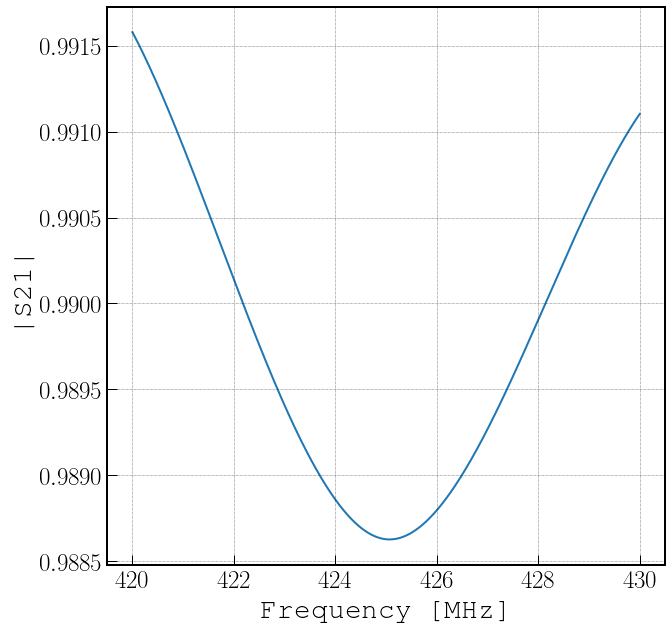

In [10]:
fig, ax = plt.subplots(figsize=(10,10))
ax.plot(f, np.abs(S21))
ax.grid(which='both')
ax.set_xlabel('Frequency [MHz]')
ax.set_ylabel(r'|S21|')
ax.axis('tight');

In [12]:
len(reso_params['frequency'])

380

In [4]:
inductor_fn = "../numerical_sims/waffle_inductor.csv"
capacitor_fn = "../numerical_sims/cap_273_full.csv"
ind_params = load_data(inductor_fn, nports=2)
cap_params = load_data(capacitor_fn, nports=3)

In [5]:
print(cap_params['Z11'].imag[:5])
print(cap_params['Z21'].imag[:5])
print(cap_params['Z31'].imag[:5])
print ("\n")
print(cap_params['Z12'].imag[:5])
print(cap_params['Z22'].imag[:5])
print(cap_params['Z32'].imag[:5])
print ("\n")
print(cap_params['Z13'].imag[:5])
print(cap_params['Z23'].imag[:5])
print(cap_params['Z33'].imag[:5])

[-3016.24270255 -2942.60837727 -2872.47876292 -2805.60933028
 -2741.77778483]
[-515.35774452 -502.78342599 -490.80742605 -479.38803792 -468.48734401]
[-515.76070014 -503.19713852 -491.23191674 -479.82332639 -468.93344983]


[-515.35774452 -502.78342599 -490.80742605 -479.38803792 -468.48734401]
[-660.36788148 -644.16631206 -628.73325545 -614.01516211 -599.96334449]
[-662.74107793 -646.60107792 -631.22972687 -616.5734767  -602.583643  ]


[-515.76070014 -503.19713852 -491.23191674 -479.82332639 -468.93344983]
[-662.74107793 -646.60107792 -631.22972687 -616.5734767  -602.583643  ]
[-660.57645679 -644.38053331 -628.95312451 -614.24067253 -600.19448463]


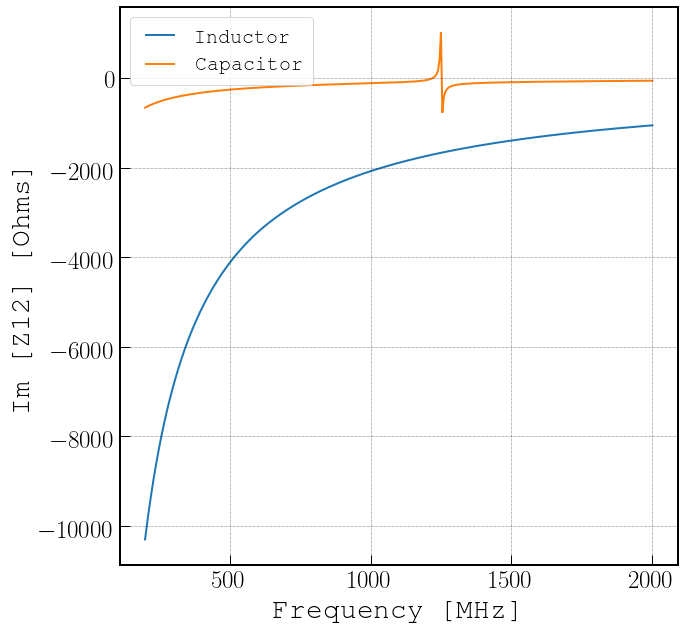

In [8]:
fig, ax = plt.subplots(figsize=(10,10))
ax.plot(ind_params['frequency'], ind_params['Z12'].imag, label='Inductor')
ax.plot(cap_params['frequency'], cap_params['Z22'].imag, label='Capacitor')
ax.grid(which='both')
ax.set_xlabel('Frequency [MHz]')
ax.set_ylabel(r'Im [Z12] [Ohms]')
ax.axis('tight')
ax.legend(loc='best');

In [13]:
f = ind_params['frequency']
omega = f * 2*pi*MHz
C = 1/omega/np.imag(1/cap_params['Y12'])/pF
L = -1/omega*np.imag(1/ind_params['Y12'])/nH

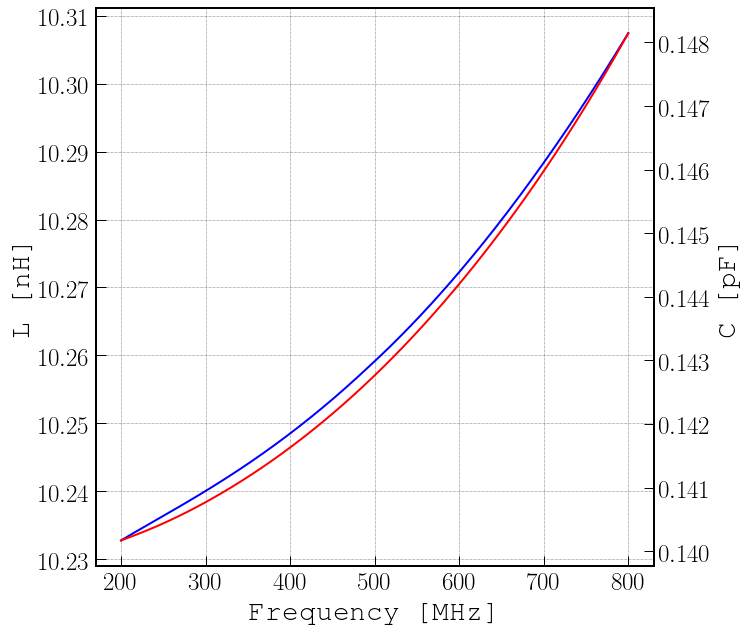

In [14]:
fig, ax = plt.subplots(figsize=(10,10))
ax2 = ax.twinx()
ax.plot(f, L, 'b', label='Inductance')
ax2.plot(f, C, 'r', label='Capacitance')
# ax.plot(cap_params['frequency'], -cap_params['Y12'].imag, label='Capacitor')
ax.grid(which='both')
ax.set_xlabel('Frequency [MHz]')
ax.set_ylabel(r'L [nH]')
ax2.set_ylabel(r'C [pF]')
ax.axis('tight');

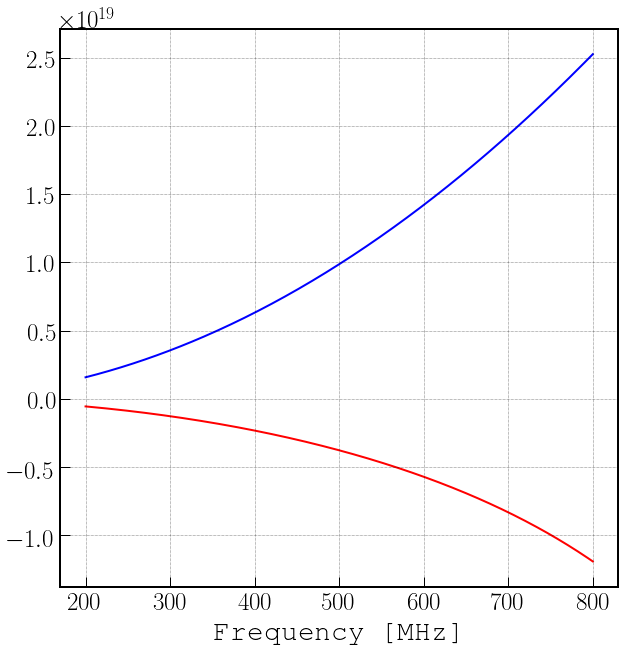

In [37]:
fig, ax = plt.subplots(figsize=(10,10))
# ax2 = ax.twinx()
ax.plot(f, omega**2, 'b')
ax.plot(f, 1/(L*nH*C*pF), 'r', label='Capacitance')
# ax.plot(cap_params['frequency'], -cap_params['Y12'].imag, label='Capacitor')
ax.grid(which='both')
ax.set_xlabel('Frequency [MHz]')
ax.axis('tight');